In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_data.shape   # Train set include 60000 image with 28*28

(60000, 28, 28)

In [ ]:
test_data.shape

(10000, 28, 28)

In [ ]:
""" Labels 0 T-shirt/top 5 Sandal

1 Trouser 6 Shirt

2 Pullover 7 Sneaker

3 Dress 8 Bag

4 Coat 9 Ankle boot """;

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Trouser


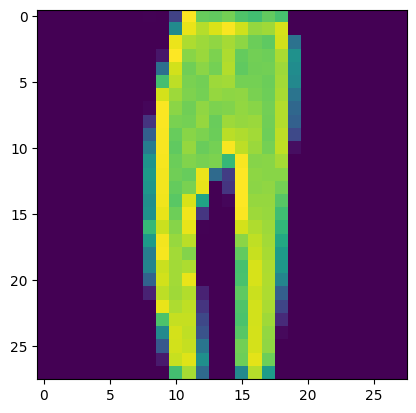

In [ ]:
# Plot a single example
images = 86

import matplotlib.pyplot as plt
plt.imshow(train_data[images]);

print(class_names[train_labels[images]])

### Create a model for Non_normalize

In [ ]:
model_noNormalize = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape), # input layer (we had to reshape 28x28 to 784)
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_noNormalize.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

In [ ]:
history = model_noNormalize.fit(train_data,
                      train_labels,
                      epochs = 100,
                      validation_data = (test_data, test_labels),
                      batch_size = 16)

Epoch 1/100
3750/3750 [==============================] - 13s 3ms/step - loss: 2.1703 - accuracy: 0.1648 - val_loss: 1.9649 - val_accuracy: 0.2277
Epoch 2/100
3750/3750 [==============================] - 9s 2ms/step - loss: 1.7728 - accuracy: 0.2419 - val_loss: 1.6974 - val_accuracy: 0.2896
Epoch 3/100
3750/3750 [==============================] - 5s 1ms/step - loss: 1.6746 - accuracy: 0.2840 - val_loss: 1.6507 - val_accuracy: 0.3129
Epoch 4/100
3750/3750 [==============================] - 6s 2ms/step - loss: 1.6467 - accuracy: 0.2962 - val_loss: 1.6360 - val_accuracy: 0.2964
Epoch 5/100
3750/3750 [==============================] - 5s 1ms/step - loss: 1.6344 - accuracy: 0.3019 - val_loss: 1.6266 - val_accuracy: 0.3237
Epoch 6/100
3750/3750 [==============================] - 6s 2ms/step - loss: 1.6066 - accuracy: 0.3100 - val_loss: 1.5475 - val_accuracy: 0.3196
Epoch 7/100
3750/3750 [==============================] - 5s 1ms/step - loss: 1.5401 - accuracy: 0.3228 - val_loss: 1.5197 - val_a

In [ ]:
history_noNormalize = pd.DataFrame(history.history)

In [ ]:
history_noNormalize.tail()

,loss,accuracy,val_loss,val_accuracy
95,1.411832,0.375767,1.429176,0.3808
96,1.413960,0.376133,1.429664,0.3777
97,1.412249,0.377117,1.437402,0.3770
98,1.412229,0.376133,1.430242,0.3795
99,1.411554,0.376033,1.446173,0.3621


<Axes: >

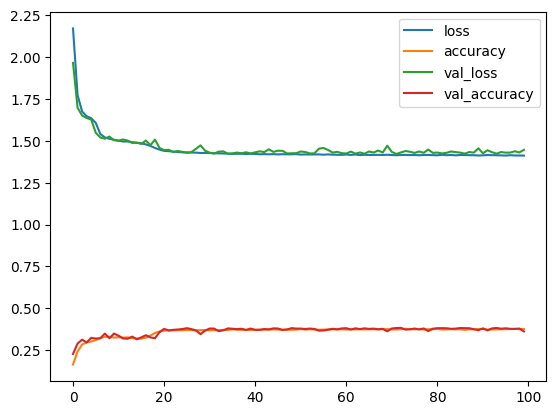

In [ ]:
history_noNormalize.plot() # No overfitting but too underfit

### Model for normalize

In [ ]:
train_data_normalize = train_data / 255.0
test_data_normalize = test_data / 255.0



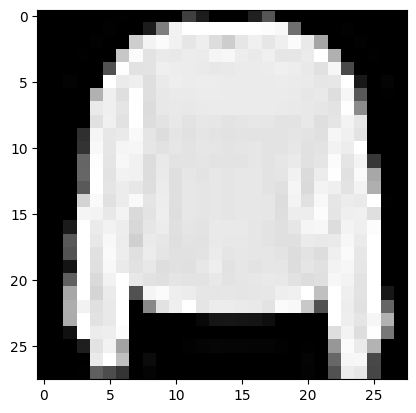

In [ ]:
plt.imshow(train_data_normalize[7], cmap='gray')

In [ ]:
model_Normalize = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data_normalize[0].shape),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

model_Normalize.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

In [ ]:
history = model_Normalize.fit(train_data_normalize,
                      train_labels,
                      epochs = 100,
                      validation_data = (test_data_normalize, test_labels),
                      batch_size = 16)

Epoch 1/100
3750/3750 [==============================] - 7s 2ms/step - loss: 0.9073 - accuracy: 0.6739 - val_loss: 0.7155 - val_accuracy: 0.7487
Epoch 2/100
3750/3750 [==============================] - 5s 1ms/step - loss: 0.6494 - accuracy: 0.7666 - val_loss: 0.6367 - val_accuracy: 0.7711
Epoch 3/100
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6070 - accuracy: 0.7782 - val_loss: 0.6244 - val_accuracy: 0.7736
Epoch 4/100
3750/3750 [==============================] - 5s 1ms/step - loss: 0.5883 - accuracy: 0.7848 - val_loss: 0.6278 - val_accuracy: 0.7695
Epoch 5/100
3750/3750 [==============================] - 6s 2ms/step - loss: 0.5762 - accuracy: 0.7886 - val_loss: 0.5937 - val_accuracy: 0.7842
Epoch 6/100
3750/3750 [==============================] - 6s 1ms/step - loss: 0.5703 - accuracy: 0.7909 - val_loss: 0.5972 - val_accuracy: 0.7856
Epoch 7/100
3750/3750 [==============================] - 6s 2ms/step - loss: 0.5633 - accuracy: 0.7934 - val_loss: 0.6193 - val_ac

<Axes: >

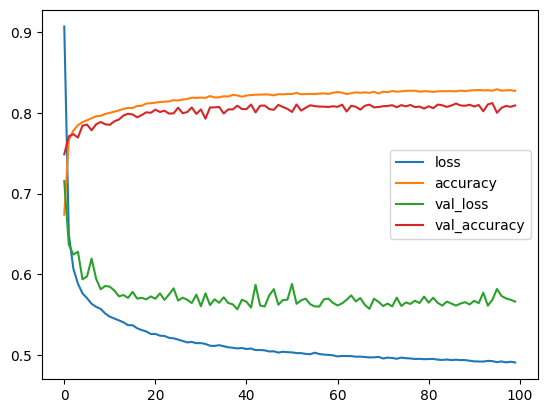

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# Kabul edilebilir bir overfit durumu var

## Confusion Matrix and Classification Report

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

313/313 [==============================] - 1s 2ms/step


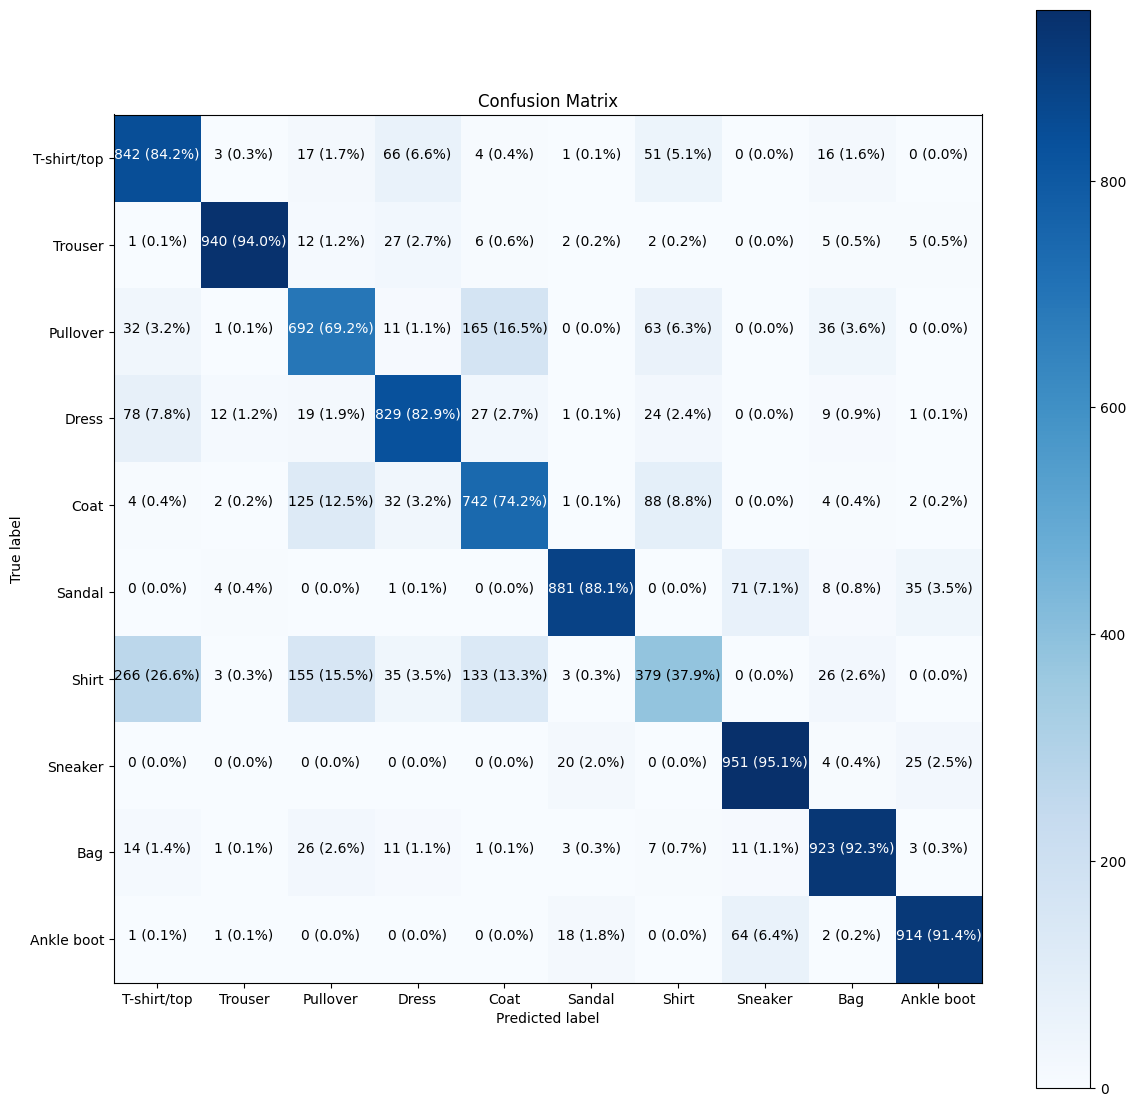

In [ ]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = model_Normalize.predict(test_data_normalize).argmax(axis = 1), #Argmax ile en yükseğini seçmemiz lazım
                      classes = class_names,
                      figsize = (14, 14), text_size = 10)

### What patterns is our model learning?

In [ ]:
model_Normalize.layers

In [ ]:
model_Normalize.layers[1]

In [ ]:
model_Normalize.layers[1].get_weights()

[array([[-1.567803  , -4.0877075 ,  3.7965324 ,  0.28114522],
        [ 3.3479218 , -0.14445566, -0.022488  , -0.06789419],
        [ 4.8986773 , -3.2499223 ,  4.8957148 , -0.35094297],
        ...,
        [ 0.30403864,  0.15078107,  0.44127434,  2.164195  ],
        [ 3.0487216 ,  0.7446957 , -0.9759132 , -1.3260274 ],
        [ 0.37632546, -1.0631561 ,  2.5996983 , -1.6094269 ]],
       dtype=float32),
 array([2.687489 , 3.6690495, 5.238323 , 1.7690086], dtype=float32)]